# 🏦 Lending Club Loan EDA: Why Loans are Rejected vs Accepted

## Objective
Analyze the key factors that determine whether a loan application is **accepted** or **rejected**.

### Key Questions:
- How does **DTI ratio** differ between accepted/rejected loans?
- What **risk scores** lead to rejection?
- Does **loan amount** affect acceptance?
- Does **employment length** matter?
- Which **loan purposes** get rejected more often?

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Color palette for visualizations
COLORS = {'Accepted': '#2ecc71', 'Rejected': '#e74c3c'}
print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

In [2]:
# Load the combined loan data (accepted + rejected)
df = pd.read_csv('combined_loan_data.csv')

# Create a readable status column
df['status'] = df['is_rejected'].map({0: 'Accepted', 1: 'Rejected'})

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Dataset loaded successfully!
Shape: 3,583,964 rows × 72 columns


,loan_amnt,dti,emp_length,risk_score,is_rejected,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,purpose_car financing,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home buying,purpose_home_improvement,purpose_house,purpose_major purchase,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,status
0,3600.00,5.91,10.00,677.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Accepted
1,24700.00,16.06,10.00,717.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Accepted
2,20000.00,10.78,10.00,697.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Accepted
3,35000.00,17.06,10.00,787.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Accepted
4,10400.00,25.37,3.00,697.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Accepted


## 3. Dataset Overview

In [3]:
# Basic information about the dataset
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\n📊 Shape: {df.shape}")
print(f"\n📋 Columns ({len(df.columns)} total):")

# Identify feature types
numeric_cols = ['loan_amnt', 'dti', 'emp_length', 'risk_score']
state_cols = [c for c in df.columns if c.startswith('addr_state_')]
purpose_cols = [c for c in df.columns if c.startswith('purpose_')]

print(f"   - Numeric features: {numeric_cols}")
print(f"   - State features: {len(state_cols)} columns (one-hot encoded)")
print(f"   - Purpose features: {len(purpose_cols)} columns (one-hot encoded)")
print(f"   - Target: is_rejected")

print("\n📈 Data Types:")
print(df[numeric_cols + ['is_rejected']].dtypes)

DATASET OVERVIEW

📊 Shape: (3583964, 72)

📋 Columns (72 total):
   - Numeric features: ['loan_amnt', 'dti', 'emp_length', 'risk_score']
   - State features: 50 columns (one-hot encoded)
   - Purpose features: 16 columns (one-hot encoded)
   - Target: is_rejected

📈 Data Types:
loan_amnt      float64
dti            float64
emp_length     float64
risk_score     float64
is_rejected      int64
dtype: object


## 4. Target Variable Distribution (Accepted vs Rejected)

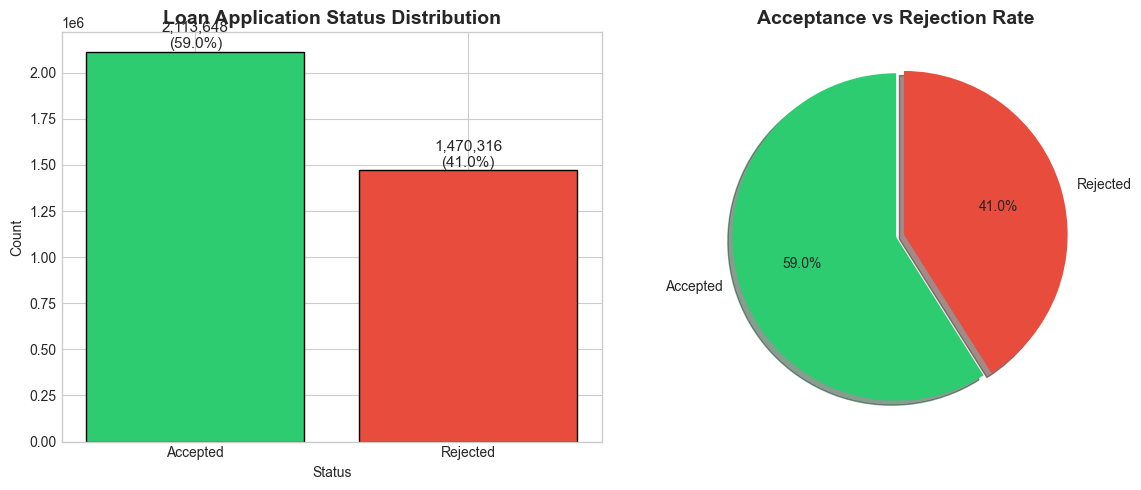


📊 Summary:
   Total Applications: 3,583,964
   Accepted: 2,113,648 (59.0%)
   Rejected: 1,470,316 (41.0%)


In [4]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
status_counts = df['status'].value_counts()
colors = [COLORS['Accepted'], COLORS['Rejected']]
axes[0].bar(status_counts.index, status_counts.values, color=colors, edgecolor='black')
axes[0].set_title('Loan Application Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
for i, (idx, val) in enumerate(zip(status_counts.index, status_counts.values)):
    axes[0].text(i, val + 20000, f'{val:,}\n({val/len(df)*100:.1f}%)', ha='center', fontsize=11)

# Pie chart
axes[1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
            colors=colors, explode=[0, 0.05], shadow=True, startangle=90)
axes[1].set_title('Acceptance vs Rejection Rate', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Summary:")
print(f"   Total Applications: {len(df):,}")
print(f"   Accepted: {status_counts['Accepted']:,} ({status_counts['Accepted']/len(df)*100:.1f}%)")
print(f"   Rejected: {status_counts['Rejected']:,} ({status_counts['Rejected']/len(df)*100:.1f}%)")

## 5. Descriptive Statistics

In [5]:
# Descriptive statistics for key numeric features
numeric_cols = ['loan_amnt', 'dti', 'emp_length', 'risk_score']

print("="*80)
print("DESCRIPTIVE STATISTICS - KEY FEATURES")
print("="*80)

# Overall statistics
print("\n📊 Overall Statistics:")
display(df[numeric_cols].describe().round(2))

# Statistics by status
print("\n📊 Statistics by Loan Status:")
stats_by_status = df.groupby('status')[numeric_cols].agg(['mean', 'median', 'std']).round(2)
display(stats_by_status)

DESCRIPTIVE STATISTICS - KEY FEATURES

📊 Overall Statistics:


,loan_amnt,dti,emp_length,risk_score
count,3583964.00,3583964.00,3583964.00,3583964.00
mean,14179.95,82.23,3.71,670.39
std,10024.50,4633.68,4.09,72.50
min,200.00,-1.00,0.00,0.00
25%,6000.00,11.08,0.00,652.00
50%,12000.00,18.46,2.00,677.00
75%,20000.00,27.38,8.00,707.00
max,1000000.00,4408800.00,10.00,990.00



📊 Statistics by Loan Status:


loan_amnt                      dti                emp_length         \
              mean   median      std   mean median     std       mean median   
status                                                                         
Accepted  15250.21 13100.00  9221.12  18.58  17.73   11.81       5.93   6.00   
Rejected  12641.40 10000.00 10895.11 173.72  20.53 7233.41       0.53   0.00   

              risk_score               
          std       mean median   std  
status                                 
Accepted 3.72     700.40 692.00 32.72  
Rejected 1.91     627.25 636.00 90.10

## 6. Univariate Analysis - Key Features Distribution

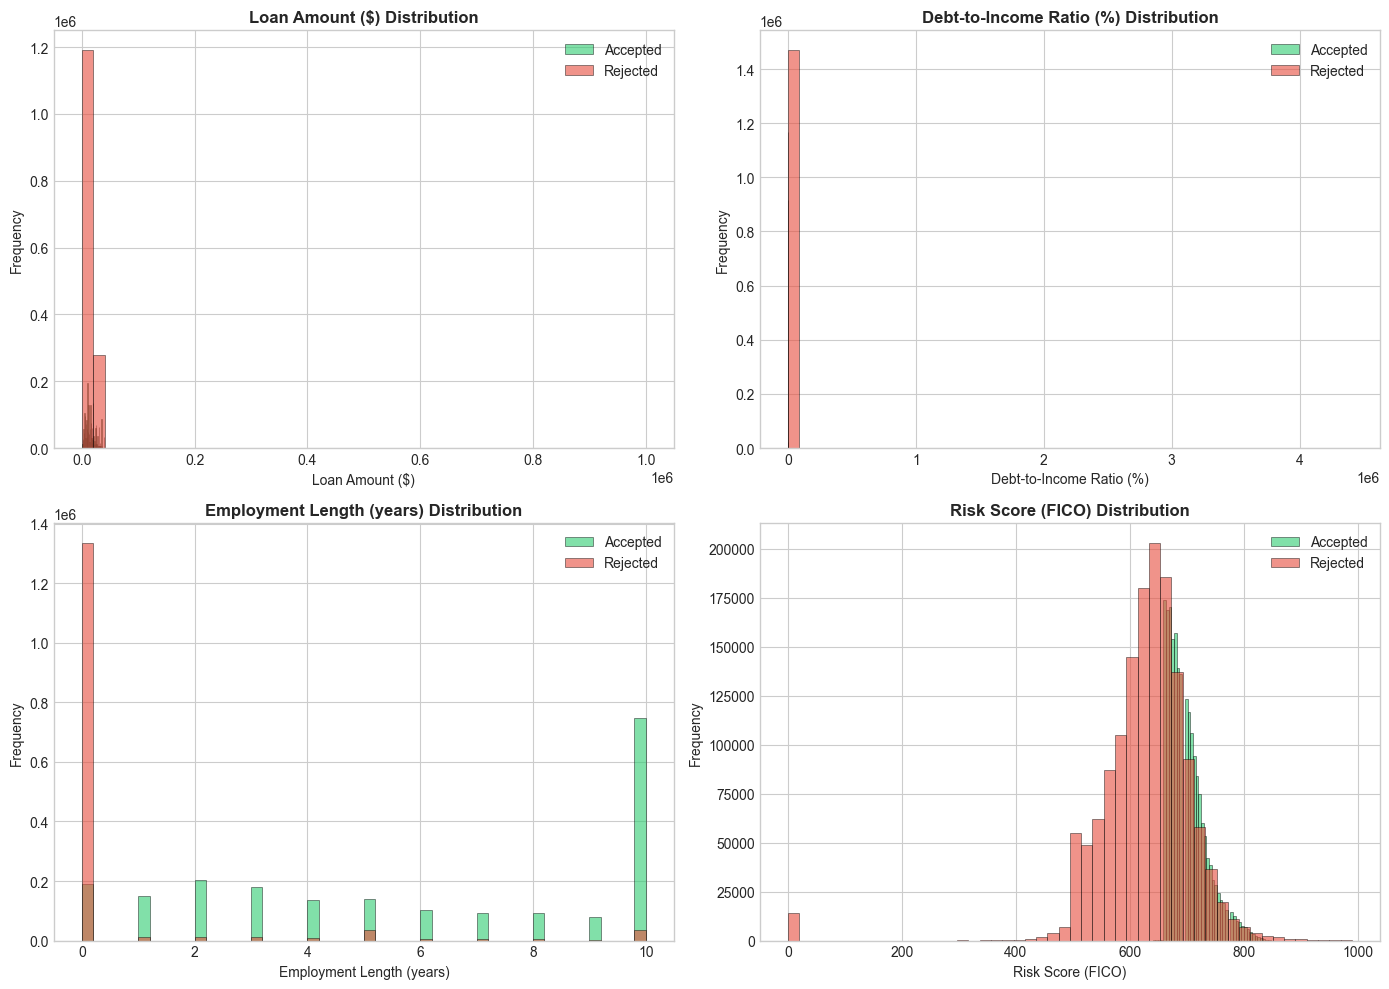

In [6]:
# Distribution of key features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

features = [
    ('loan_amnt', 'Loan Amount ($)', axes[0, 0]),
    ('dti', 'Debt-to-Income Ratio (%)', axes[0, 1]),
    ('emp_length', 'Employment Length (years)', axes[1, 0]),
    ('risk_score', 'Risk Score (FICO)', axes[1, 1])
]

for col, title, ax in features:
    # Plot histogram for each status
    for status, color in COLORS.items():
        data = df[df['status'] == status][col].dropna()
        ax.hist(data, bins=50, alpha=0.6, label=status, color=color, edgecolor='black', linewidth=0.5)
    
    ax.set_title(f'{title} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(title)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

## 7. Bivariate Analysis - Accepted vs Rejected Comparison

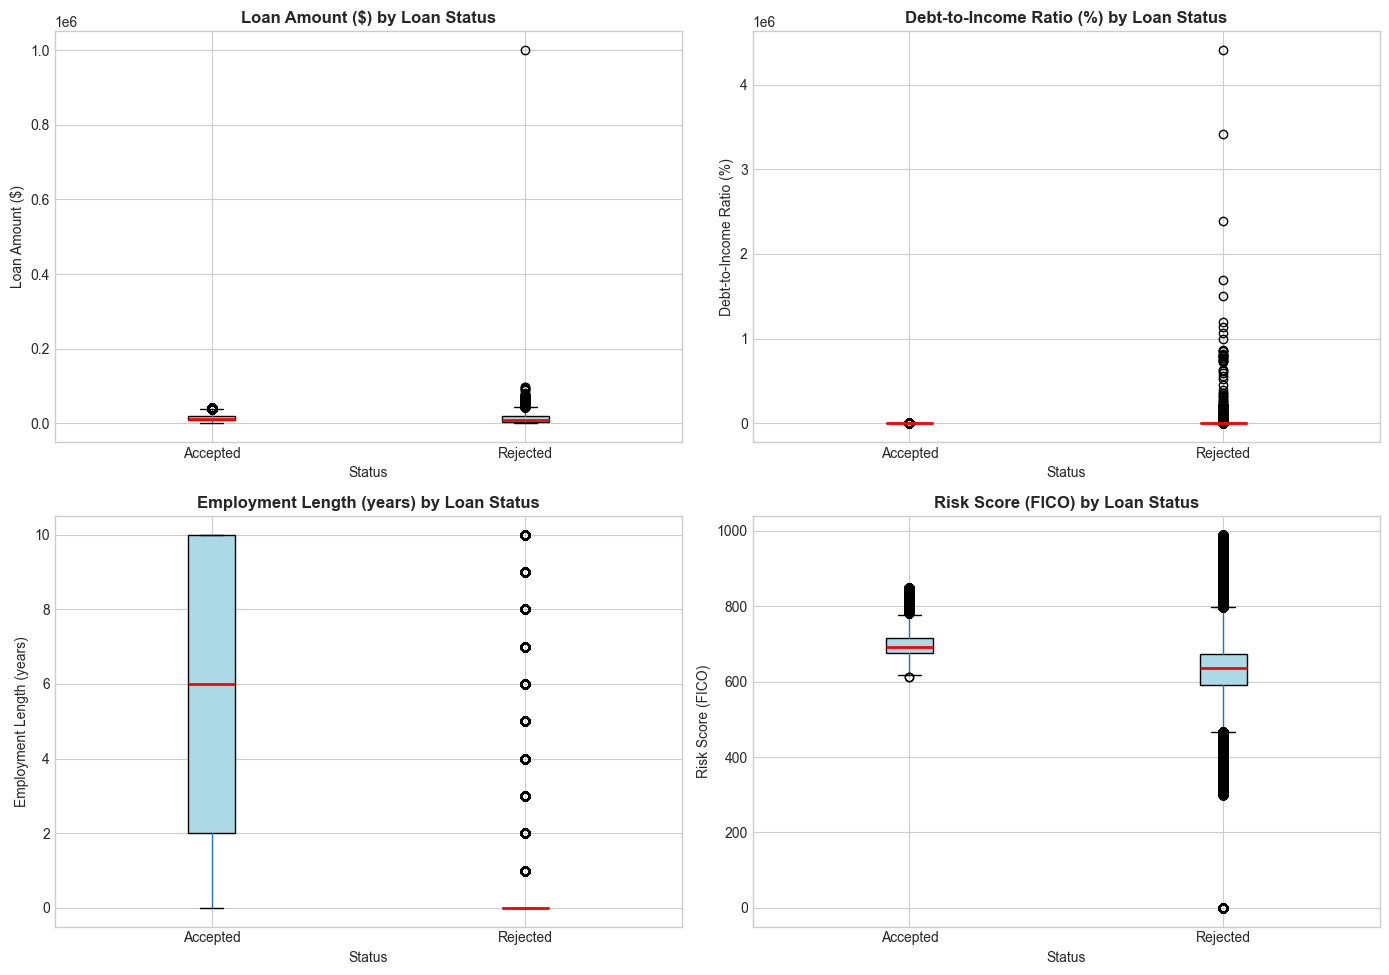


📊 Mean Comparison (Accepted vs Rejected):
--------------------------------------------------
Loan Amount ($):
   Accepted: 15250.21
   Rejected: 12641.40
   Difference: -2608.81 (-17.1%)

Debt-to-Income Ratio (%):
   Accepted: 18.58
   Rejected: 173.72
   Difference: +155.14 (+834.8%)

Employment Length (years):
   Accepted: 5.93
   Rejected: 0.53
   Difference: -5.40 (-91.1%)

Risk Score (FICO):
   Accepted: 700.40
   Rejected: 627.25
   Difference: -73.15 (-10.4%)



In [7]:
# Box plots comparing features by loan status
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

features = [
    ('loan_amnt', 'Loan Amount ($)', axes[0, 0]),
    ('dti', 'Debt-to-Income Ratio (%)', axes[0, 1]),
    ('emp_length', 'Employment Length (years)', axes[1, 0]),
    ('risk_score', 'Risk Score (FICO)', axes[1, 1])
]

for col, title, ax in features:
    df.boxplot(column=col, by='status', ax=ax, 
               patch_artist=True,
               boxprops=dict(facecolor='lightblue'),
               medianprops=dict(color='red', linewidth=2))
    ax.set_title(f'{title} by Loan Status', fontsize=12, fontweight='bold')
    ax.set_xlabel('Status')
    ax.set_ylabel(title)

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

# Print mean comparison
print("\n📊 Mean Comparison (Accepted vs Rejected):")
print("-"*50)
for col, title, _ in features:
    accepted_mean = df[df['status']=='Accepted'][col].mean()
    rejected_mean = df[df['status']=='Rejected'][col].mean()
    diff = rejected_mean - accepted_mean
    pct_diff = (diff / accepted_mean) * 100 if accepted_mean != 0 else 0
    print(f"{title}:")
    print(f"   Accepted: {accepted_mean:.2f}")
    print(f"   Rejected: {rejected_mean:.2f}")
    print(f"   Difference: {diff:+.2f} ({pct_diff:+.1f}%)")
    print()

## 8. Risk Score Analysis - Key Factor for Rejection

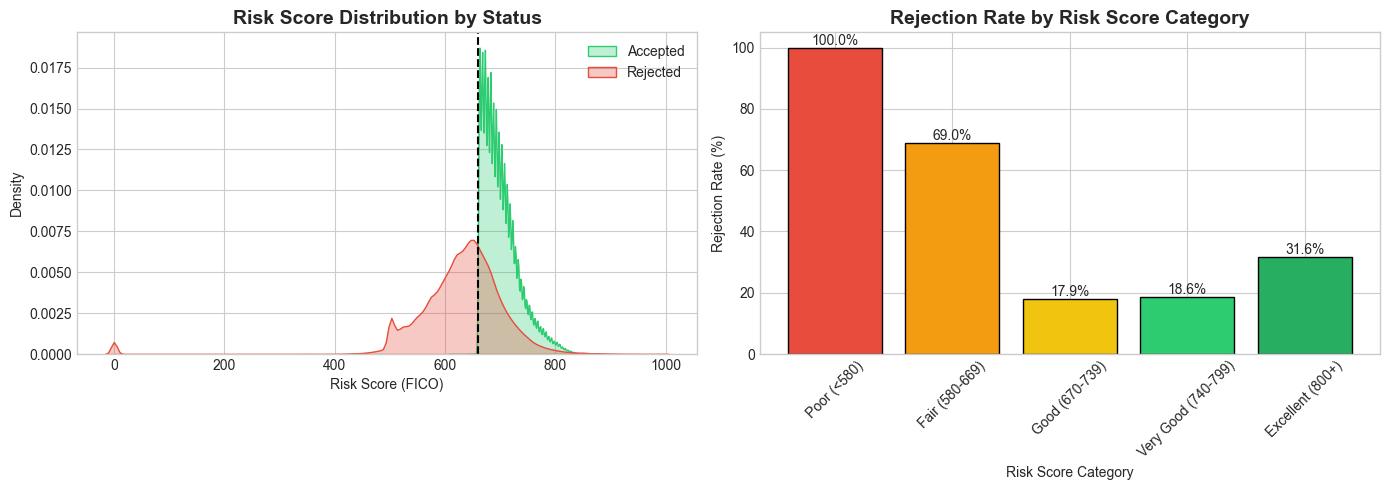


📊 Rejection Rate by Risk Score Category:
                     rejection_rate    count
risk_category                               
Poor (<580)                  100.00   296436
Fair (580-669)                68.97  1106000
Good (670-739)                17.93  1840835
Very Good (740-799)           18.65   285693
Excellent (800+)              31.64    39730


In [8]:
# Risk score analysis - this is likely the most important factor
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE plot
for status, color in COLORS.items():
    data = df[df['status'] == status]['risk_score'].dropna()
    sns.kdeplot(data, ax=axes[0], label=status, color=color, fill=True, alpha=0.3)
axes[0].set_title('Risk Score Distribution by Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Risk Score (FICO)')
axes[0].legend()
axes[0].axvline(x=660, color='black', linestyle='--', label='Fair Credit Threshold (660)')

# Create risk score bins
df['risk_category'] = pd.cut(df['risk_score'], 
                              bins=[0, 580, 670, 740, 800, 900],
                              labels=['Poor (<580)', 'Fair (580-669)', 'Good (670-739)', 
                                     'Very Good (740-799)', 'Excellent (800+)'])

# Rejection rate by risk category
risk_rejection = df.groupby('risk_category')['is_rejected'].agg(['mean', 'count'])
risk_rejection['rejection_rate'] = risk_rejection['mean'] * 100

colors_bar = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60']
bars = axes[1].bar(risk_rejection.index.astype(str), risk_rejection['rejection_rate'], color=colors_bar, edgecolor='black')
axes[1].set_title('Rejection Rate by Risk Score Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Risk Score Category')
axes[1].set_ylabel('Rejection Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

for bar, rate in zip(bars, risk_rejection['rejection_rate']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{rate:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 Rejection Rate by Risk Score Category:")
print(risk_rejection[['rejection_rate', 'count']].round(2))

## 9. DTI Ratio Analysis

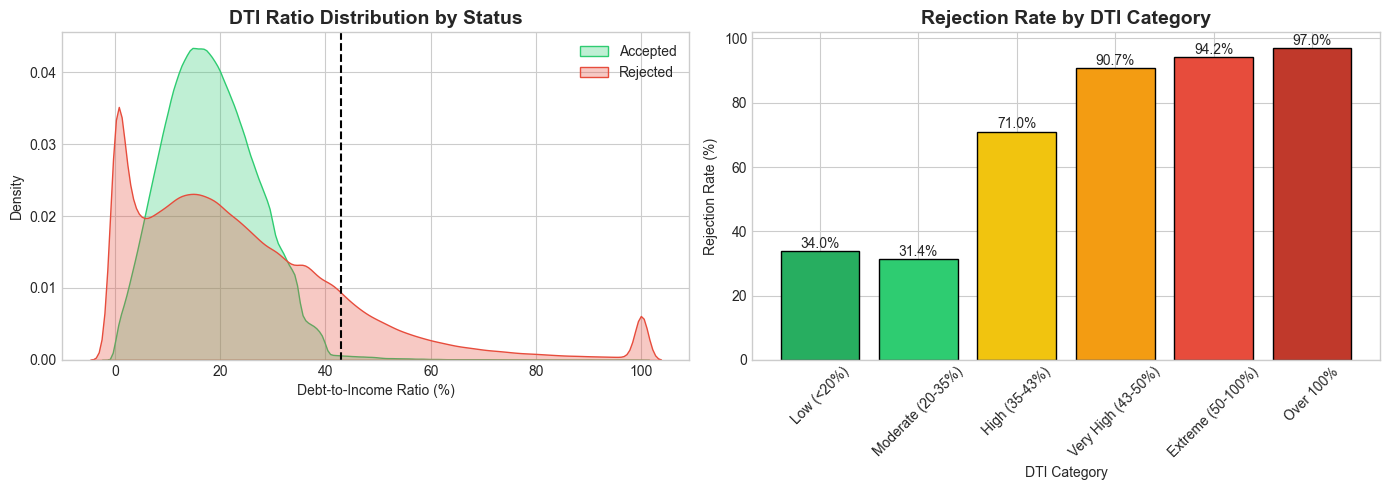


📊 Rejection Rate by DTI Category:
                    rejection_rate    count
dti_category                               
Low (<20%)                   33.96  1900309
Moderate (20-35%)            31.35  1144151
High (35-43%)                70.99   187040
Very High (43-50%)           90.72    78886
Extreme (50-100%)            94.17   150495
Over 100%                    97.03    47745


In [9]:
# DTI Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE plot for DTI
for status, color in COLORS.items():
    data = df[df['status'] == status]['dti'].dropna()
    # Filter outliers for better visualization
    data = data[data <= 100]
    sns.kdeplot(data, ax=axes[0], label=status, color=color, fill=True, alpha=0.3)
axes[0].set_title('DTI Ratio Distribution by Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Debt-to-Income Ratio (%)')
axes[0].legend()
axes[0].axvline(x=43, color='black', linestyle='--', label='QM Threshold (43%)')

# Create DTI bins
df['dti_category'] = pd.cut(df['dti'], 
                             bins=[0, 20, 35, 43, 50, 100, float('inf')],
                             labels=['Low (<20%)', 'Moderate (20-35%)', 'High (35-43%)', 
                                    'Very High (43-50%)', 'Extreme (50-100%)', 'Over 100%'])

# Rejection rate by DTI category
dti_rejection = df.groupby('dti_category')['is_rejected'].agg(['mean', 'count'])
dti_rejection['rejection_rate'] = dti_rejection['mean'] * 100

colors_bar = ['#27ae60', '#2ecc71', '#f1c40f', '#f39c12', '#e74c3c', '#c0392b']
bars = axes[1].bar(dti_rejection.index.astype(str), dti_rejection['rejection_rate'], color=colors_bar, edgecolor='black')
axes[1].set_title('Rejection Rate by DTI Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('DTI Category')
axes[1].set_ylabel('Rejection Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

for bar, rate in zip(bars, dti_rejection['rejection_rate']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{rate:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 Rejection Rate by DTI Category:")
print(dti_rejection[['rejection_rate', 'count']].round(2))

## 10. Loan Amount Analysis

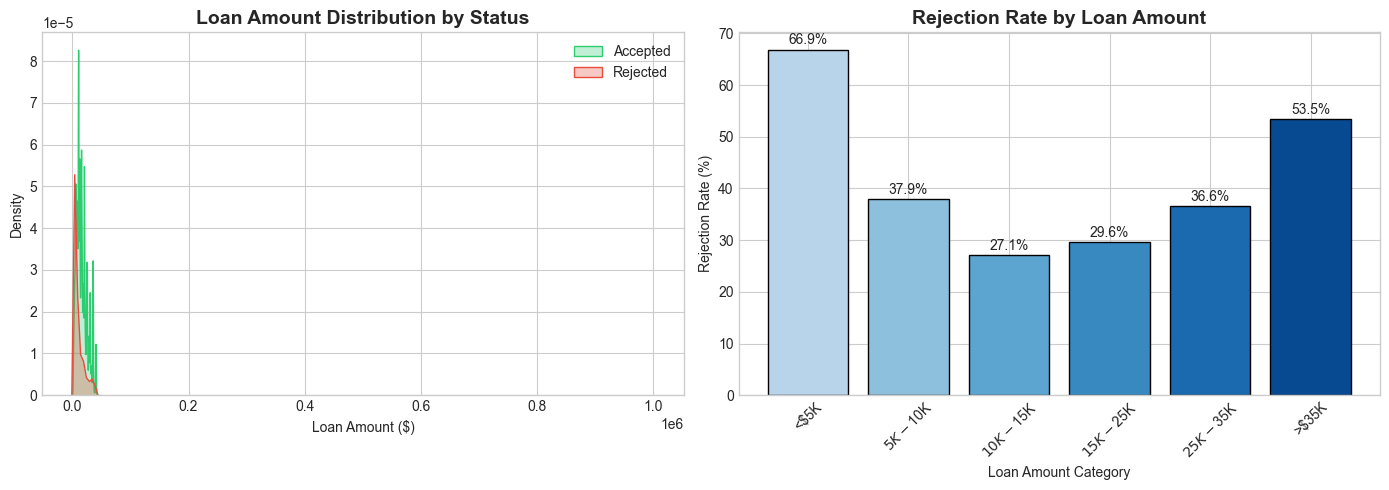


📊 Rejection Rate by Loan Amount:
               rejection_rate   count
loan_category                        
<$5K                    66.86  805757
$5K-$10K                37.89  885398
$10K-$15K               27.12  598131
$15K-$25K               29.61  796718
$25K-$35K               36.62  405171
>$35K                   53.47   92789


In [10]:
# Loan Amount Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE plot for Loan Amount
for status, color in COLORS.items():
    data = df[df['status'] == status]['loan_amnt'].dropna()
    sns.kdeplot(data, ax=axes[0], label=status, color=color, fill=True, alpha=0.3)
axes[0].set_title('Loan Amount Distribution by Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Amount ($)')
axes[0].legend()

# Create Loan Amount bins
df['loan_category'] = pd.cut(df['loan_amnt'], 
                              bins=[0, 5000, 10000, 15000, 25000, 35000, float('inf')],
                              labels=['<$5K', '$5K-$10K', '$10K-$15K', '$15K-$25K', '$25K-$35K', '>$35K'])

# Rejection rate by Loan Amount category
loan_rejection = df.groupby('loan_category')['is_rejected'].agg(['mean', 'count'])
loan_rejection['rejection_rate'] = loan_rejection['mean'] * 100

colors_bar = plt.cm.Blues(np.linspace(0.3, 0.9, len(loan_rejection)))
bars = axes[1].bar(loan_rejection.index.astype(str), loan_rejection['rejection_rate'], color=colors_bar, edgecolor='black')
axes[1].set_title('Rejection Rate by Loan Amount', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loan Amount Category')
axes[1].set_ylabel('Rejection Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

for bar, rate in zip(bars, loan_rejection['rejection_rate']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{rate:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 Rejection Rate by Loan Amount:")
print(loan_rejection[['rejection_rate', 'count']].round(2))

## 11. Employment Length Analysis

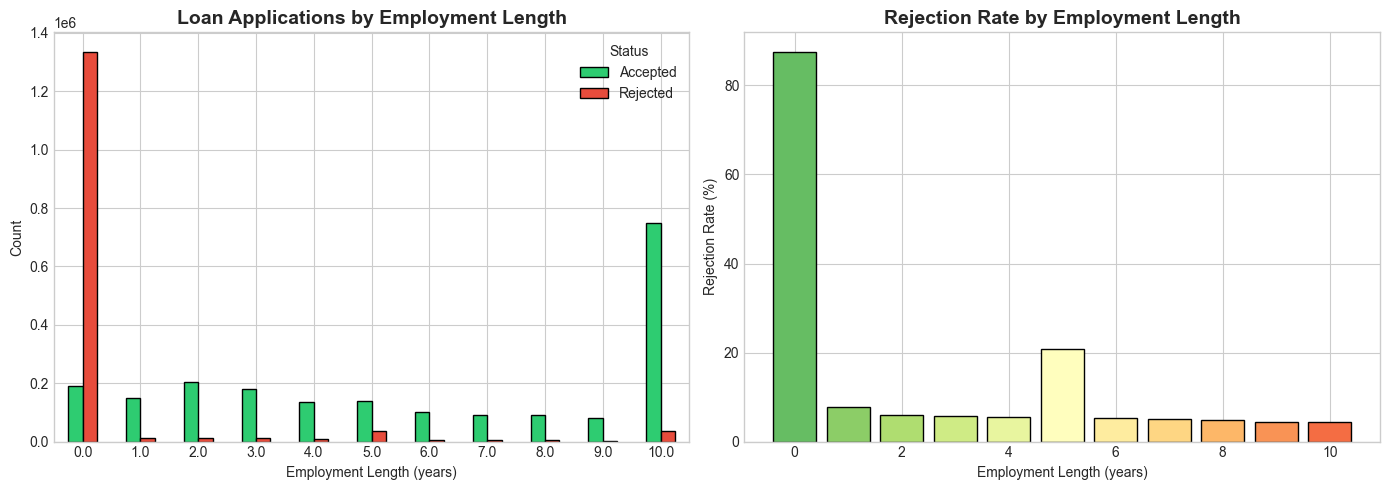


📊 Rejection Rate by Employment Length:
            rejection_rate    count
emp_length                         
0.00                 87.55  1525334
1.00                  7.74   160842
2.00                  5.96   216579
3.00                  5.68   191627
4.00                  5.59   144690
5.00                 20.84   176461
6.00                  5.28   108349
7.00                  4.98    97554
8.00                  4.75    96494
9.00                  4.34    82993
10.00                 4.48   783041


In [11]:
# Employment Length Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count by employment length
emp_counts = df.groupby(['emp_length', 'status']).size().unstack(fill_value=0)
emp_counts.plot(kind='bar', ax=axes[0], color=[COLORS['Accepted'], COLORS['Rejected']], edgecolor='black')
axes[0].set_title('Loan Applications by Employment Length', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Employment Length (years)')
axes[0].set_ylabel('Count')
axes[0].legend(title='Status')
axes[0].tick_params(axis='x', rotation=0)

# Rejection rate by employment length
emp_rejection = df.groupby('emp_length')['is_rejected'].agg(['mean', 'count'])
emp_rejection['rejection_rate'] = emp_rejection['mean'] * 100

bars = axes[1].bar(emp_rejection.index, emp_rejection['rejection_rate'], 
                   color=plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(emp_rejection))), edgecolor='black')
axes[1].set_title('Rejection Rate by Employment Length', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Employment Length (years)')
axes[1].set_ylabel('Rejection Rate (%)')

plt.tight_layout()
plt.show()

print("\n📊 Rejection Rate by Employment Length:")
print(emp_rejection[['rejection_rate', 'count']].round(2))

## 12. Loan Purpose Analysis

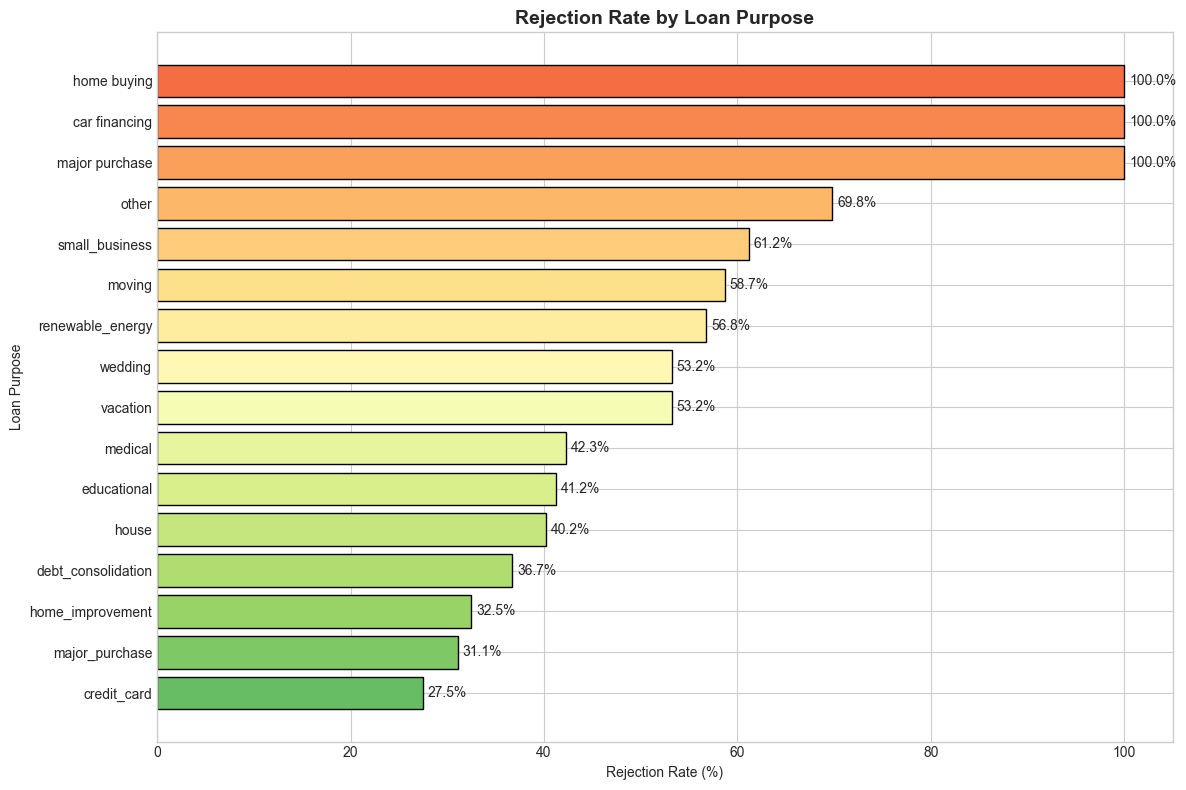


📊 Rejection Rate by Loan Purpose:
                    rejection_rate   count
purpose_decoded                           
credit_card                  27.50   93288
major_purchase               31.10    9391
home_improvement             32.50   28701
debt_consolidation           36.70  269071
house                        40.20    3045
educational                  41.20      97
medical                      42.30    6250
vacation                     53.20    4337
wedding                      53.20     770
renewable_energy             56.80     437
moving                       58.70    4841
small_business               61.20    8549
other                        69.80   58817
major purchase              100.00    2894
car financing               100.00    6798
home buying                 100.00    2714


In [12]:
# Loan Purpose Analysis - Extract from one-hot encoded columns
purpose_cols = [c for c in df.columns if c.startswith('purpose_')]

# Reconstruct purpose from one-hot encoding
def get_purpose(row):
    for col in purpose_cols:
        if row[col] == 1:
            return col.replace('purpose_', '')
    return 'debt_consolidation'  # baseline category (drop_first=True)

# Sample for faster processing
df_sample = df.sample(min(500000, len(df)), random_state=42)
df_sample['purpose_decoded'] = df_sample.apply(get_purpose, axis=1)

# Rejection rate by purpose
purpose_stats = df_sample.groupby('purpose_decoded').agg({
    'is_rejected': ['mean', 'count']
}).round(3)
purpose_stats.columns = ['rejection_rate', 'count']
purpose_stats['rejection_rate'] = purpose_stats['rejection_rate'] * 100
purpose_stats = purpose_stats.sort_values('rejection_rate', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(purpose_stats)))
bars = ax.barh(purpose_stats.index, purpose_stats['rejection_rate'], color=colors, edgecolor='black')
ax.set_title('Rejection Rate by Loan Purpose', fontsize=14, fontweight='bold')
ax.set_xlabel('Rejection Rate (%)')
ax.set_ylabel('Loan Purpose')

for bar, rate in zip(bars, purpose_stats['rejection_rate']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{rate:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 Rejection Rate by Loan Purpose:")
print(purpose_stats)

## 13. Correlation Analysis

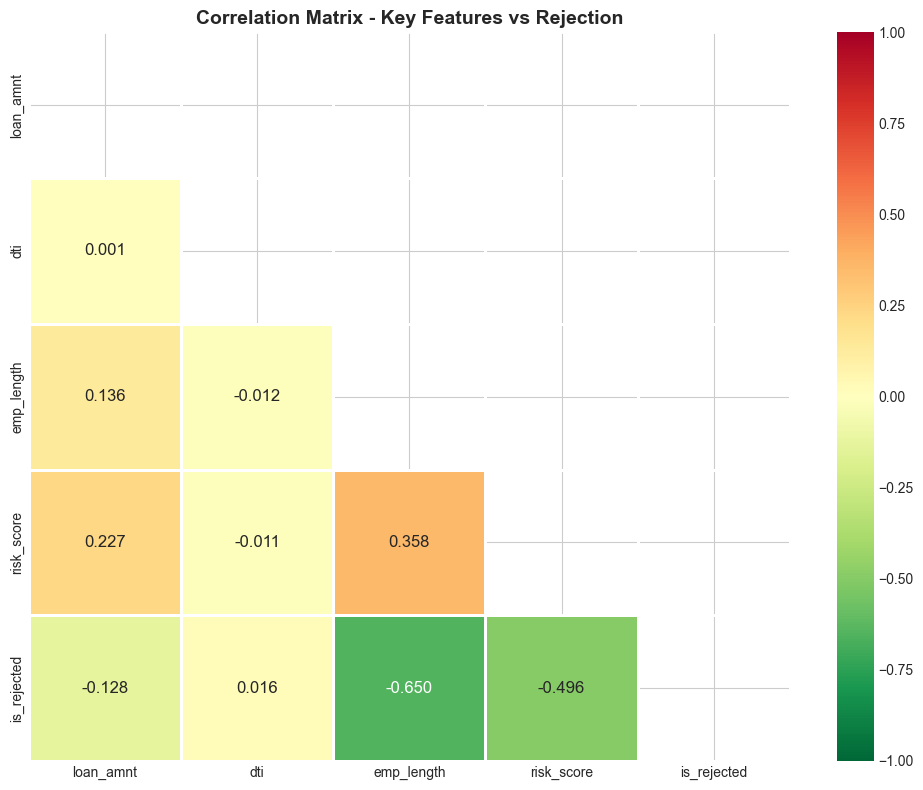


📊 Correlation with Rejection (is_rejected):
--------------------------------------------------
emp_length     : -0.6501  (↓ Lower = More Rejection)
risk_score     : -0.4963  (↓ Lower = More Rejection)
loan_amnt      : -0.1280  (↓ Lower = More Rejection)
dti            : +0.0165  (↑ Higher = More Rejection)


In [13]:
# Correlation Analysis - Focus on key numeric features
numeric_features = ['loan_amnt', 'dti', 'emp_length', 'risk_score', 'is_rejected']
corr_matrix = df[numeric_features].corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlGn_r', center=0,
            fmt='.3f', linewidths=1, ax=ax, vmin=-1, vmax=1,
            annot_kws={'size': 12})
ax.set_title('Correlation Matrix - Key Features vs Rejection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with target
print("\n📊 Correlation with Rejection (is_rejected):")
print("-"*50)
target_corr = corr_matrix['is_rejected'].drop('is_rejected').sort_values(key=abs, ascending=False)
for feature, corr in target_corr.items():
    direction = "↑ Higher = More Rejection" if corr > 0 else "↓ Lower = More Rejection"
    print(f"{feature:15}: {corr:+.4f}  ({direction})")

## 14. Outlier Detection

📊 Outlier Analysis (IQR Method):

loan_amnt:
   Q1: 6000.00, Q3: 20000.00, IQR: 14000.00
   Bounds: [-15000.00, 41000.00]
   Outliers: 563 (0.02%)

dti:
   Q1: 11.08, Q3: 27.38, IQR: 16.30
   Bounds: [-13.37, 51.83]
   Outliers: 183,629 (5.12%)

emp_length:
   Q1: 0.00, Q3: 8.00, IQR: 8.00
   Bounds: [-12.00, 20.00]
   Outliers: 0 (0.00%)

risk_score:
   Q1: 652.00, Q3: 707.00, IQR: 55.00
   Bounds: [569.50, 789.50]
   Outliers: 314,757 (8.78%)


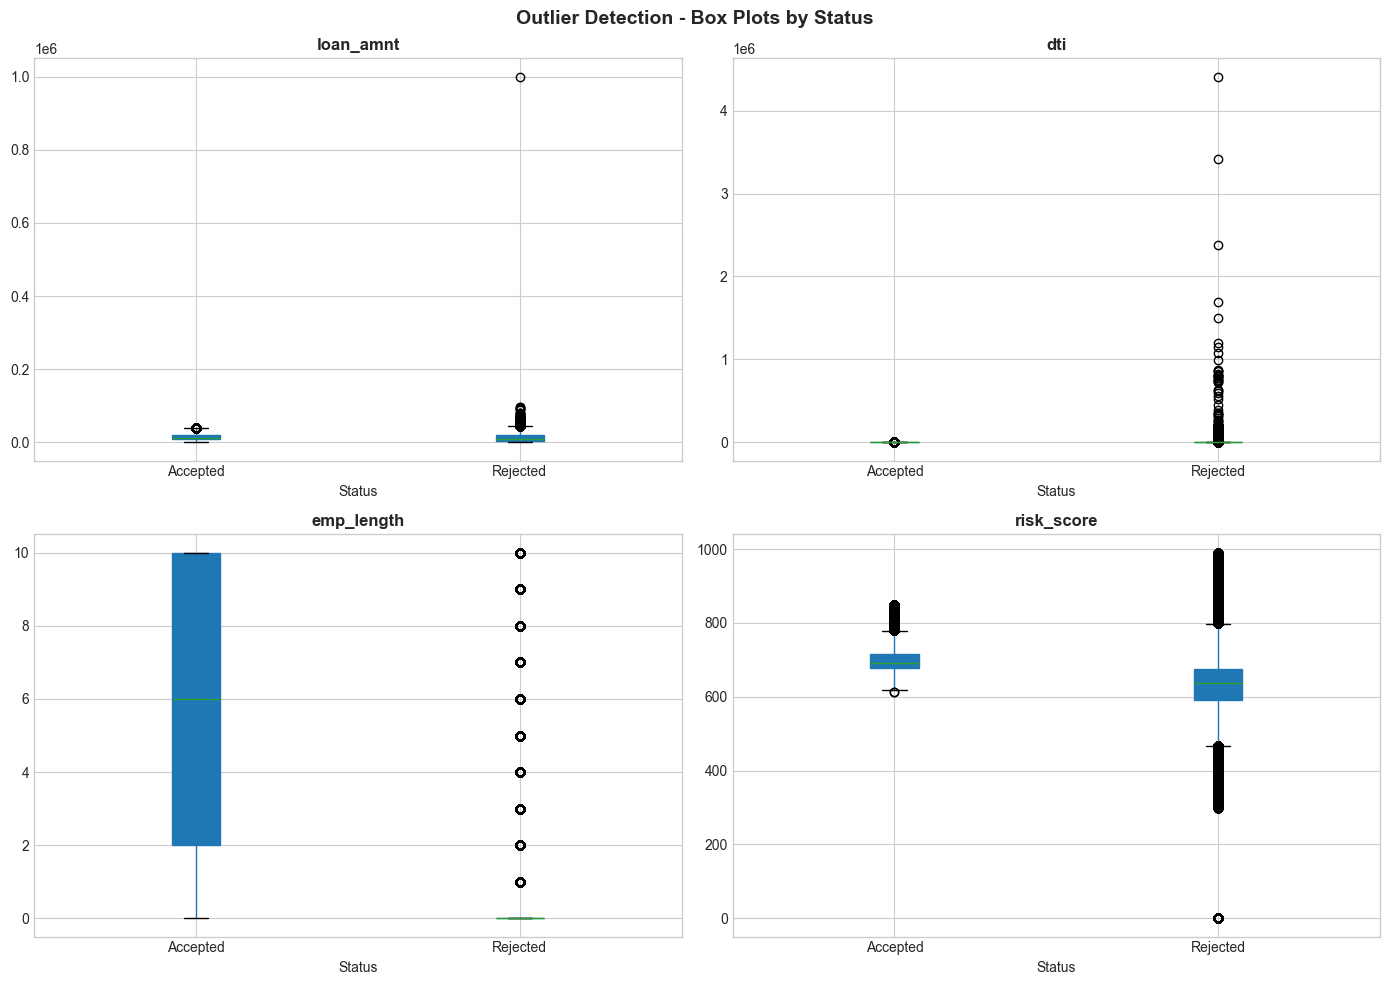

In [14]:
# Outlier Detection using IQR method
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

features = ['loan_amnt', 'dti', 'emp_length', 'risk_score']

print("📊 Outlier Analysis (IQR Method):")
print("="*60)

for idx, (feature, ax) in enumerate(zip(features, axes.flatten())):
    # Calculate IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_pct = len(outliers) / len(df) * 100
    
    # Box plot
    df.boxplot(column=feature, by='status', ax=ax, patch_artist=True)
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Status')
    
    print(f"\n{feature}:")
    print(f"   Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"   Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"   Outliers: {len(outliers):,} ({outlier_pct:.2f}%)")

plt.suptitle('Outlier Detection - Box Plots by Status', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 15. Key Insights Summary

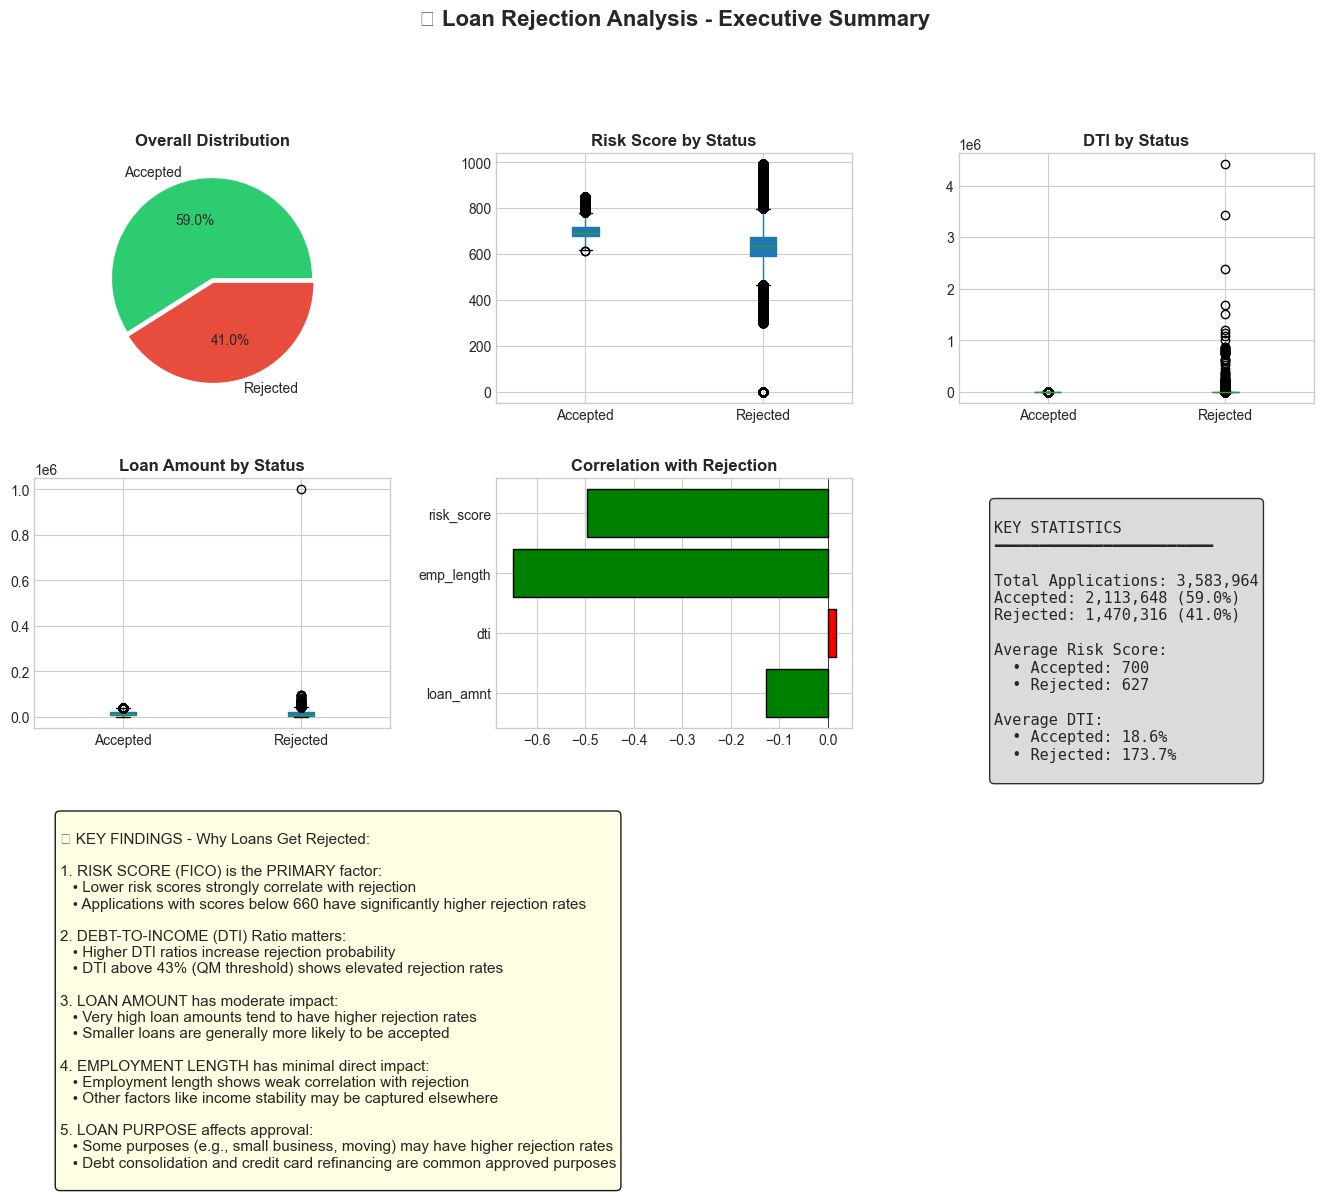

In [15]:
# Summary Dashboard
fig = plt.figure(figsize=(16, 12))

# Create a summary visualization
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Overall rejection rate
ax1 = fig.add_subplot(gs[0, 0])
status_counts = df['status'].value_counts()
ax1.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',
        colors=[COLORS['Accepted'], COLORS['Rejected']], explode=[0, 0.05])
ax1.set_title('Overall Distribution', fontweight='bold')

# 2. Risk Score comparison
ax2 = fig.add_subplot(gs[0, 1])
df.boxplot(column='risk_score', by='status', ax=ax2, patch_artist=True)
ax2.set_title('Risk Score by Status', fontweight='bold')
ax2.set_xlabel('')
plt.suptitle('')

# 3. DTI comparison
ax3 = fig.add_subplot(gs[0, 2])
df.boxplot(column='dti', by='status', ax=ax3, patch_artist=True)
ax3.set_title('DTI by Status', fontweight='bold')
ax3.set_xlabel('')
plt.suptitle('')

# 4. Loan Amount comparison
ax4 = fig.add_subplot(gs[1, 0])
df.boxplot(column='loan_amnt', by='status', ax=ax4, patch_artist=True)
ax4.set_title('Loan Amount by Status', fontweight='bold')
ax4.set_xlabel('')
plt.suptitle('')

# 5. Feature importance (correlation with rejection)
ax5 = fig.add_subplot(gs[1, 1])
numeric_features = ['loan_amnt', 'dti', 'emp_length', 'risk_score']
correlations = df[numeric_features + ['is_rejected']].corr()['is_rejected'].drop('is_rejected')
colors = ['red' if c > 0 else 'green' for c in correlations]
ax5.barh(correlations.index, correlations.values, color=colors, edgecolor='black')
ax5.set_title('Correlation with Rejection', fontweight='bold')
ax5.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# 6. Key statistics
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('off')
stats_text = f"""
KEY STATISTICS
━━━━━━━━━━━━━━━━━━━━━━━━

Total Applications: {len(df):,}
Accepted: {(df['is_rejected']==0).sum():,} ({(df['is_rejected']==0).mean()*100:.1f}%)
Rejected: {(df['is_rejected']==1).sum():,} ({(df['is_rejected']==1).mean()*100:.1f}%)

Average Risk Score:
  • Accepted: {df[df['status']=='Accepted']['risk_score'].mean():.0f}
  • Rejected: {df[df['status']=='Rejected']['risk_score'].mean():.0f}

Average DTI:
  • Accepted: {df[df['status']=='Accepted']['dti'].mean():.1f}%
  • Rejected: {df[df['status']=='Rejected']['dti'].mean():.1f}%
"""
ax6.text(0.1, 0.9, stats_text, transform=ax6.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

# 7-9. Key findings
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('off')
findings = """
🔍 KEY FINDINGS - Why Loans Get Rejected:

1. RISK SCORE (FICO) is the PRIMARY factor:
   • Lower risk scores strongly correlate with rejection
   • Applications with scores below 660 have significantly higher rejection rates

2. DEBT-TO-INCOME (DTI) Ratio matters:
   • Higher DTI ratios increase rejection probability
   • DTI above 43% (QM threshold) shows elevated rejection rates

3. LOAN AMOUNT has moderate impact:
   • Very high loan amounts tend to have higher rejection rates
   • Smaller loans are generally more likely to be accepted

4. EMPLOYMENT LENGTH has minimal direct impact:
   • Employment length shows weak correlation with rejection
   • Other factors like income stability may be captured elsewhere

5. LOAN PURPOSE affects approval:
   • Some purposes (e.g., small business, moving) may have higher rejection rates
   • Debt consolidation and credit card refinancing are common approved purposes
"""
ax7.text(0.02, 0.95, findings, transform=ax7.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='sans-serif',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.suptitle('📊 Loan Rejection Analysis - Executive Summary', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 16. Next Steps

Based on this EDA, the recommended next steps are:

1. **Build ML Models** - Train classifiers (Logistic Regression, Random Forest, XGBoost) to predict loan rejection
2. **Feature Engineering** - Create interaction features (e.g., loan_amnt/annual_inc ratio)
3. **Model Interpretation** - Use SHAP values to explain individual predictions
4. **Risk Scoring** - Develop a custom risk score based on the key factors identified

---
**Key Takeaway**: Risk Score (FICO) and DTI Ratio are the most important factors determining loan approval/rejection.